# Laboratorio 1#
## Exploración de datos

En este laboratorio realizaremos un trabajo de exploración sobre un dataset dado. Hemos tomado como inspiración el siguiente kernel de Kaggle: We are from our childhood. El conjunto de datos utilizado son las respuestas de gente joven a una encuesta, con la que les proponemos trabajar. En esta notebook en particular, la autora visualiza distintos aspectos de los datos tratando de encontrar factores de variación relacionados a la respuesta “Crecí en la ciudad” o “Crecí en el campo”. La consigna para este laboratorio es realizar un trabajo similar, aunque más simple, analizando algunas de las variables de la encuesta.


## Entrega

En el repositorio de su grupo deben subir una notebook (recomendamos usar jupyter) con el código y las visualizaciones utilizadas para extraer la información que les pedimos a continuación. Si la notebook no la presentan en un github, suban también un archivo html para que podamos ver las imágenes sin necesidad de ejecutar el código. Recuerden que entre las celdas de código puede agregar markdown y latex para explicar las hipótesis que plantean y conclusiones que obtienen.

El informe sólo es necesario para aclarar decisiones de diseño que hayan tomado, librerías extras utilizadas, etc.
Implementación
Se deberá presentar al menos la siguiente información:

#### Estadísticas descriptivas

1) Calcular estadísticos como la moda, media, mediana y  desviación estándar del peso y de la edad </span>. ¿Responden a alguna distribución conocida?

2) Realizar un  análisis de outliers.

3) Explicar cómo varían las métricas cuando desglosamos por género. ¿Responden a alguna distribución conocida? Comparar cualitativamente y gráficamente ambas distribuciones. Calcular la correlación entre todas estas variables y mostrarla con un gráfico conjunto.

4) Calcular la probabilidad marginal y conjunta, y la correlación entre otras dos variables, por ejemplo consumo de alcohol y tabaquismo.

5) Representar visualmente la probabilidad conjunta entre los valores posibles de las variables elegidas.

6) Responda a la siguientes preguntas: ¿Qué pasaría con los niveles de tabaquismo si se prohíbe fumar en los bares? ¿Qué pasaría con la cantidad de consumidores de alcohol si disminuye la cantidad de fumadores que consumen alcohol?

Se evaluarán los siguientes aspectos:
Estructura legible de la notebook.
Los tipos de gráficos son adecuados para la información representada
Otros datasets para inspirarse.

En el portal de datos abiertos de Argentina pueden encontrar datasets, la mayoría de ellos sobre agricultura. En particular encontramos datos sobre femicidios en Argentina, similar al que trabajaremos en clase de violencia institucional.

En GapMinder existe una colección de datasets que describen World wide wellfare variables.

En el github Fivethirtyeight datasets hay una colección de datos utilizados para crear reportes periodísticos con alto contenido de estadística. Entre los destacados: 
Comic characters.
Fandango.
Nutrition
Star wars
En Kaggle también existen muchas opciones de datasets y código para trabajarlos.


#### Desarrollo del laboratorio 

In [3]:
#Importamos las librerías
%matplotlib inline
import itertools
import pandas
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


sns.set_style("whitegrid")
sns.set_context("talk")


In [4]:
# Importamos el dataset con el cual trabajaremos.
dataset = pandas.read_csv("Documents/responses.csv",
                          encoding='utf8')

In [5]:
#Vamos a usar .describe() para mostrar algunos estadísticos (aunque la moda no estará). Luego volveremos a calcularlos
dataset[['Age', 'Weight']].dropna().describe()

,Age,Weight
count,987.000000,987.000000
mean,20.437690,66.426545
std,2.839328,13.850382
min,15.000000,41.000000
25%,19.000000,55.000000
50%,20.000000,64.000000
75%,22.000000,75.000000
max,30.000000,165.000000


### 1) Estadísticos
Calculamos la media, moda, mediana de los valores Peso y Edad


    Media_Weight: 66
    Mediana_Weight: 64
    Moda_Weight: 60
    Variacion_Weight: 13



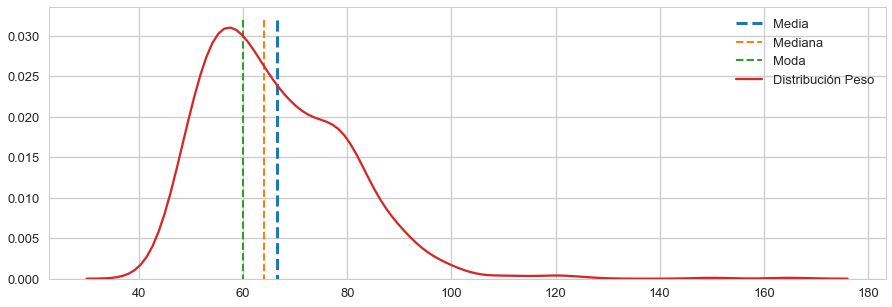

In [12]:
#Calculamos la media, moda, mediana de los valores Peso y Edad
#Graficamos los estadísticos.

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15,5))
media_peso = dataset['Weight'].mean()
mediana_peso = dataset['Weight'].median()
moda_peso = dataset['Weight'].mode()
variacion_peso = dataset['Weight'].std()
plt.plot([media_peso, media_peso], [0.032, 0], linewidth=3, linestyle ='dashed', label = 'Media')
plt.plot([mediana_peso, mediana_peso], [0.032, 0], linewidth=2, linestyle ='dashed', label = 'Mediana')
plt.plot([moda_peso, moda_peso], [0.032, 0], linewidth=2, linestyle ='dashed', label = 'Moda')
#plt.plot([variacion_peso, variacion_peso], [0.032, 0], linewidth=2, linestyle ='dashed', label = 'variacion Estandar')
sns.kdeplot(dataset['Weight'].dropna(),label ='Distribución Peso')

print("""
    Media_Weight: %d
    Mediana_Weight: %d
    Moda_Weight: %d
    Variacion_Weight: %d
""" % (media_peso,mediana_peso,moda_peso, variacion_peso))


Vemos que tanto la mediana como la media están a la derecha de la moda (el valor más frecuente). Entonces podemos decir que es una distribución asimétrica a la derecha.


    Media_Age: 20
    Mediana__Age: 20
    Moda__Age: 19
    Variacion__Age: 2



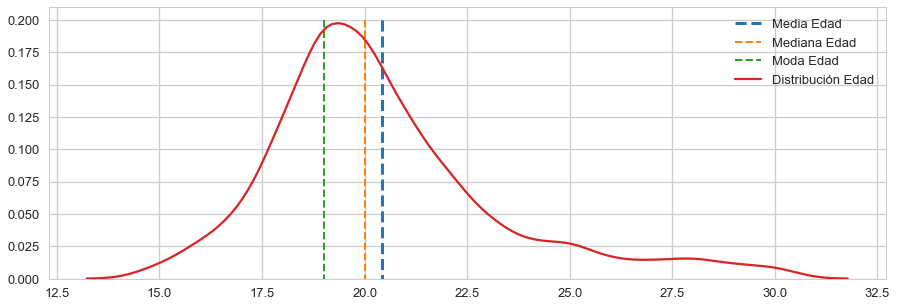

In [13]:
#Sacamos estadísticos de Edad y los graficamos

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15,5))
media_age = dataset['Age'].mean()
mediana_age = dataset['Age'].median()
moda_age = dataset['Age'].mode()
variacion_age = dataset['Age'].std()
plt.plot([media_age, media_age], [0.2, 0], linewidth=3, linestyle ='dashed', label = 'Media Edad')
plt.plot([mediana_age, mediana_age], [0.2, 0], linewidth=2, linestyle ='dashed', label = 'Mediana Edad')
plt.plot([moda_age, moda_age], [0.2, 0], linewidth=2, linestyle ='dashed', label = 'Moda Edad')
#plt.plot([variacion_peso, variacion_peso], [0.032, 0], linewidth=2, linestyle ='dashed', label = 'variacion Estandar')
sns.kdeplot(dataset['Age'].dropna(),label ='Distribución Edad')

print("""
    Media_Age: %d
    Mediana__Age: %d
    Moda__Age: %d
    Variacion__Age: %d
""" % (media_age,mediana_age,moda_age, variacion_age))


#### 2) Análisis sobre los outliers
DS = Desviación estandar

Variable Peso, los outliers representan a las personas con sobrepeso (por encima de los 108 Kg) y del total de la muestra, de 990 entradas, estas representan ~1% del total (9 registros). No existen outliers por debajo de la media ya que el registro mínimo registrado es de 41 Kg

Variable Edad, los outliers representan a las personas estrictamente mayores a los 26 años. Dado que la media para esta variable es de 20,434 y la desviación estandard es de 2.83. Las edades que sobrepasen los 26 (2 veces la DS sobre la media) son considerados outliers. El dato mínimo registrado es el de una persona de 15 años, al estar dentro del rango de 2 DS, no se considera outlier.

Outliers Edad


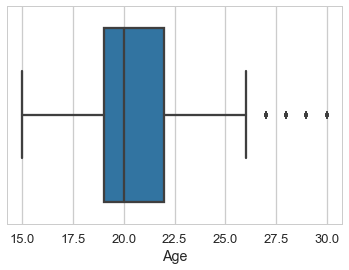

In [15]:
#Graficamos los outliers de Edad
print ('Outliers Edad')
sns.boxplot(dataset['Age'].dropna())
plt.show()

Outliers Peso


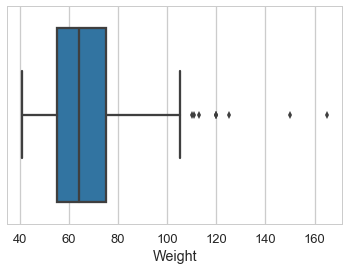

In [16]:
#Graficamos los outliers de Peso
print ('Outliers Peso')
sns.boxplot(dataset['Weight'].dropna())
plt.show()

#### 3) Explicar cómo varían las métricas cuando desglosamos por género. 


Media Peso Mujer 58.963793103448275
Mediana Peso Mujer 57.0
Desviación Estandar Peso Mujer 2.7925370075349276
Moda Peso Mujer 0    60.0
dtype: float64

Media Peso Hombre 77.08888888888889
Mediana Peso Hombre 77.0
Desviación Estandar Peso Hombre 2.7967894553381694
Moda Peso Hombre 0    80.0
dtype: float64

 Distribucion de Peso por género


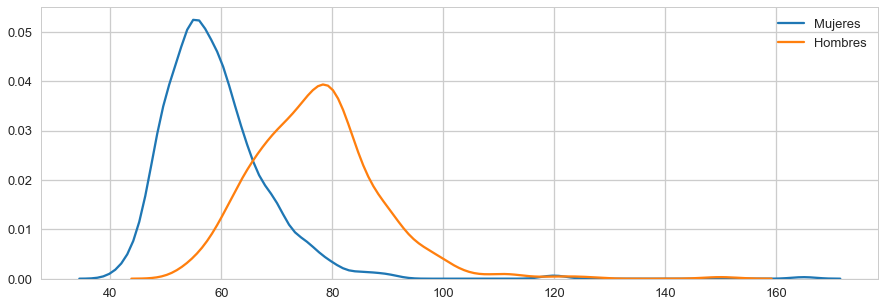

In [48]:
#Desglosamos la variable peso por género
media_peso_mujer = dataset[dataset['Gender']=='female'].Weight.dropna().mean()
print ("Media Peso Mujer",media_peso_mujer)
mediana_peso_mujer = dataset[dataset['Gender']=='female'].Weight.dropna().median()
print ("Mediana Peso Mujer",mediana_peso_mujer)
std_peso_mujer = dataset[dataset['Gender']=='female'].Weight.dropna().std()
print ("Desviación Estandar Peso Mujer", std_edad_mujer)
moda_peso_mujer = dataset[dataset['Gender']=='female'].Weight.dropna().mode()
print ("Moda Peso Mujer", moda_peso_mujer)

media_peso_hombre = dataset[dataset['Gender']=='male'].Weight.dropna().mean()
print ("\nMedia Peso Hombre",media_peso_hombre)
mediana_peso_hombre = dataset[dataset['Gender']=='male'].Weight.dropna().median()
print ("Mediana Peso Hombre",mediana_peso_hombre)
std_peso_hombre = dataset[dataset['Gender']=='male'].Weight.dropna().std()
print ("Desviación Estandar Peso Hombre", std_edad_hombre)
moda_peso_hombre = dataset[dataset['Gender']=='male'].Weight.dropna().mode()
print ("Moda Peso Hombre", moda_peso_hombre)

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15,5))

#plt.plot([media_peso, media_peso], [0.05, 0], linewidth=2, linestyle ='dashed', label = 'Media')
sns.kdeplot(dataset[dataset['Gender']=='female'].Weight.dropna(), label = "Mujeres")
sns.kdeplot(dataset[dataset['Gender']=='male'].Weight.dropna() , label = "Hombres" )


print ('\n Distribucion de Peso por género')




#### Variables descriptivas por género para el peso

Observamos que las distribuciones en ambos géneros se corresponden con distribuciones normales.

Para los hombres, la campana de Gauss es más suave que para las mujeres lo cual nos lleva a decir que los valores del Peso están en general más distribuidos que en las mujeres. 

La moda nos indica que del total de muestras, fue más frecuente encontrar hombre con un peso aproximado de 80Kg mientras que en el caso de las mujeres este valor se ubica en los 60Kgs. Observamos que la distribución de los hombres arroja valores superiores a los de las mujeres entendemos obedece a cuestiones biológicas.

Media Edad Mujer 20.113752122241088
Mediana Edad Mujer 20.0
Desviación Estandar Edad Mujer 2.7925370075349276
Moda Edad Mujer 0    19.0
dtype: float64

Media Edad Hombre 20.87286063569682
Mediana Edad Hombre 20.0
Desviación Estandar Edad Hombre 2.7967894553381694
Moda Edad Hombre 0    19.0
dtype: float64

 Distribucion de Edad por género


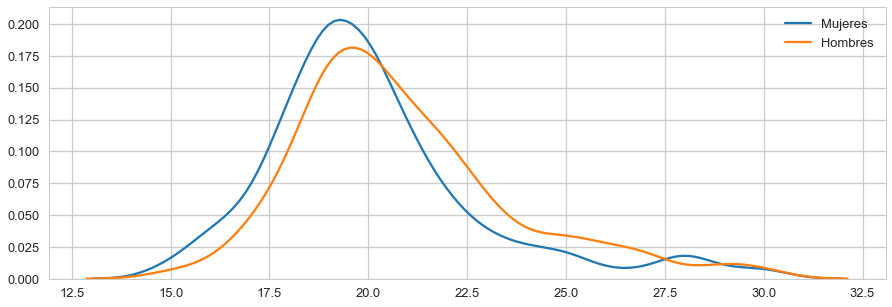

In [49]:
#Desglosamos la variable edad por género
media_edad_mujer = dataset[dataset['Gender']=='female'].Age.dropna().mean()
print ("Media Edad Mujer",media_edad_mujer)
mediana_edad_mujer = dataset[dataset['Gender']=='female'].Age.dropna().median()
print ("Mediana Edad Mujer",mediana_edad_mujer)
std_edad_mujer = dataset[dataset['Gender']=='female'].Age.dropna().std()
print ("Desviación Estandar Edad Mujer", std_edad_mujer)
moda_edad_mujer = dataset[dataset['Gender']=='female'].Age.dropna().mode()
print ("Moda Edad Mujer", moda_edad_mujer)


media_edad_hombre = dataset[dataset['Gender']=='male'].Age.dropna().mean()
print ("\nMedia Edad Hombre",media_edad_hombre)
mediana_edad_hombre = dataset[dataset['Gender']=='male'].Age.dropna().median()
print ("Mediana Edad Hombre",mediana_edad_hombre)
std_edad_hombre = dataset[dataset['Gender']=='male'].Age.dropna().std()
print ("Desviación Estandar Edad Hombre", std_edad_hombre)
moda_edad_hombre = dataset[dataset['Gender']=='male'].Age.dropna().mode()
print ("Moda Edad Hombre", moda_edad_hombre)


fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15,5))
sns.kdeplot(dataset[dataset['Gender']=='female'].Age.dropna(), label = "Mujeres" )
sns.kdeplot(dataset[dataset['Gender']=='male'].Age.dropna(), label = "Hombres")
print ('\n Distribucion de Edad por género')

#### Variables descriptivas por género para la Edad

Observamos que las distribuciones en ambos géneros se corresponden con distribuciones normales. En esta ocasión los valores son similares
 De hecho, se puede ver que los valores para las métricas analizadas con anterioridad son las mismas en ambos casos. La única diferencia es la cantidad de muestras por categoría (género). Concluimos que esta no es una variable que pueda ser objeto de un análisis comparativo.

#### 3)  ii. ¿Responden a alguna distribución conocida? 
Las variables muestran distribuciones normales. 

#### 3)  iii. Comparar cualitativamente y gráficamente ambas distribuciones. Calcular la correlación entre todas estas variables y mostrarla con un gráfico conjunto.

In [35]:
#Get means for the whole dataset and fill nan with means
hombres_pearsonr = stats.pearsonr(
dataset[dataset['Gender']=='male'].Age.fillna(media_age),
dataset[dataset['Gender']=='male'].Weight.fillna(media_peso)  
)
print (hombres_pearsonr[0])
mujeres_pearsonr = stats.pearsonr(
dataset[dataset['Gender']=='female'].Age.fillna(media_age),
dataset[dataset['Gender']=='female'].Weight.fillna(media_peso)  
)
print (mujeres_pearsonr[0])



# Remove any rows with Gender as 'nan' and any row with Age AND Weight as 'nan'
young_with_means = dataset[['Age', 'Weight', 'Gender']].dropna(axis=0, subset=['Gender']).dropna(thresh=2)

# Get means for males and fill nans with it
male = young_with_means[young_with_means.Gender == 'male']
male_means = male.mean(axis=0)
male = male.fillna(male_means)

# Get means for females and fill nans with it
female = young_with_means[young_with_means.Gender == 'female']
female_means = male.mean(axis=0)
female = female.fillna(male_means)

# Get pearson
male_pearsonr = stats.pearsonr(
    male.Age,
    male.Weight
)

female_pearsonr = stats.pearsonr(
    female.Age,
    female.Weight
)

print('\t #Pearson Male r: {0}, Female r: {1}'.format(male_pearsonr[0], female_pearsonr[0]))

0.250257637107
0.152578672662
	 #Pearson Male r: 0.2532522752495907, Female r: 0.14569046513663586


#### 4) Calcular la probabilidad marginal y conjunta, y la correlación entre otras dos variables, por ejemplo consumo de alcohol y tabaquismo.

In [51]:

dataset2 = dataset[['Alcohol' ,'Smoking' ]].dropna()

total = dataset2.shape[0]
#respuestas2 = respuestas[['Alcohol'== 'never','Smoking' == 'never smoked']].dropna().count()
a1 = dataset2[dataset2['Smoking']== 'never smoked'].Alcohol.value_counts () / total
a2 = dataset2[dataset2['Smoking']== 'tried smoking'].Alcohol.value_counts () / total
a3 = dataset2[dataset2['Smoking']== 'former smoker'].Alcohol.value_counts ()/ total
a4 = dataset2[dataset2['Smoking']== 'current smoker'].Alcohol.value_counts ()/ total
am = dataset2.Alcohol.value_counts ()
tm = dataset2.Smoking.value_counts ()
#a1 = respuestas[respuestas['Smoking']== 'never smoked'].Alcohol.value_counts ('never')
print (am)
print (tm)
#timeit sum(1 for i in x if 60 < i < 70)
#a1 =  sum (1 for 'Alcohol'  in respuestas2  if respuestas2.Alcohol == 'never' )
print ("Never Smoked\n",a1)
print ("Tried Smoking\n",a2)
print ("Former \n",a3)
print ("Current \n",a4)


#TODOOOO Pendiente el cálculo de correlación mediante el uso de variables dummies.

# Calculamos correlación entre variables tabaquismo y alcoholismo
# dataset_pearsonr = stats.pearsonr(
#     dataset.Smoking,
#     dataset.Alcohol
# )


# print('\t #Pearson Male r: {0}'.format(dataset_pearsonr[0]))

social drinker    658
drink a lot       220
never             122
Name: Alcohol, dtype: int64
tried smoking     430
never smoked      207
current smoker    188
former smoker     175
Name: Smoking, dtype: int64
Never Smoked
 social drinker    0.131
never             0.061
drink a lot       0.015
Name: Alcohol, dtype: float64
Tried Smoking
 social drinker    0.319
drink a lot       0.072
never             0.039
Name: Alcohol, dtype: float64
Former 
 social drinker    0.109
drink a lot       0.055
never             0.011
Name: Alcohol, dtype: float64
Current 
 social drinker    0.099
drink a lot       0.078
never             0.011
Name: Alcohol, dtype: float64


#### 5) Representar visualmente la probabilidad conjunta entre los valores posibles de las variables elegidas. 


tried smoking     430
never smoked      207
current smoker    188
former smoker     175
Name: Smoking, dtype: int64
social drinker    658
drink a lot       220
never             122
Name: Alcohol, dtype: int64
Never Smoked
 social drinker    131
never              61
drink a lot        15
Name: never smoked, dtype: int64
Tried Smoking
 social drinker    319
drink a lot        72
never              39
Name: tried smoking, dtype: int64
Former 
 social drinker    109
drink a lot        55
never              11
Name: former smoker, dtype: int64
Current 
 social drinker    99
drink a lot       78
never             11
Name: current smoker, dtype: int64


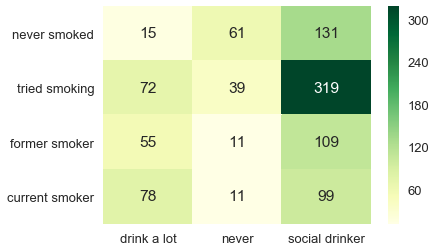

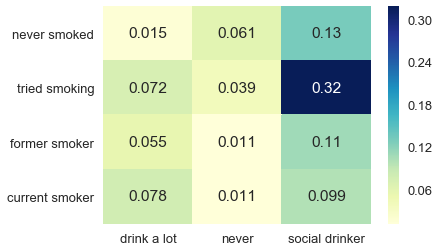

In [54]:

dataset2 = dataset[['Alcohol' ,'Smoking' ]].dropna()
total = dataset2.shape[0]
a1 = dataset2[dataset2['Smoking']== 'never smoked'].Alcohol.value_counts () 
a1.name = 'never smoked'
b1 = a1 / total
a2 = dataset2[dataset2['Smoking']== 'tried smoking'].Alcohol.value_counts () 
a2.name = 'tried smoking'
b2 = a2 / total
a3 = dataset2[dataset2['Smoking']== 'former smoker'].Alcohol.value_counts ()
a3.name = 'former smoker'
b3 = a3 / total
a4 = dataset2[dataset2['Smoking']== 'current smoker'].Alcohol.value_counts () 
a4.name = 'current smoker'
b4 = a4 / total
am = dataset2.Alcohol.value_counts ()
tm = dataset2.Smoking.value_counts ()
print (tm)
print (am)
print ("Never Smoked\n",a1)
print ("Tried Smoking\n",a2)
print ("Former \n",a3)
print ("Current \n",a4)
matriz = [a1, a2, a3, a4 ]
pmatriz = pandas.DataFrame (data= matriz)
sns.heatmap (pmatriz, xticklabels='auto', yticklabels='auto', annot=True, cmap="YlGn", fmt = ".0f")
plt.show()
matrizb = [b1, b2, b3, b4]
pmatrizb = pandas.DataFrame (data= matrizb)
sns.heatmap (pmatrizb, xticklabels='auto', yticklabels='auto', annot=True, cmap="YlGnBu")
plt.show()

In [15]:
# probabilidad conjunta 
joint_probability = pandas.crosstab(dataset.Alcohol, dataset.Smoking, normalize='all')
joint_probability

Smoking,current smoker,former smoker,never smoked,tried smoking
Alcohol,,,,
drink a lot,0.078,0.055,0.015,0.072
never,0.011,0.011,0.061,0.039
social drinker,0.099,0.109,0.131,0.319


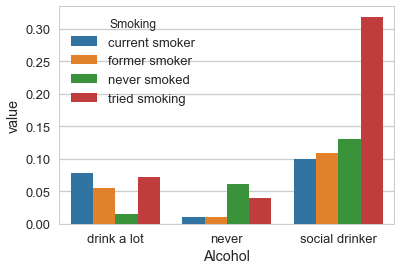

In [17]:
# representación gráfica de la probabilidad conjunta.
stacked = joint_probability.stack().reset_index().rename(columns={0:'value'})
seaborn.barplot(x=stacked.Alcohol, y=stacked.value, hue=stacked.Smoking)
plt.show()


#### Análisis del gráfico de barras

En el gráfico se visualizan separadas las posibles etiquetas de la variable aleatoria "Alcohol". Se decidió graficar agrupando por esta variable y para cada una de ellas una barra según el valor de la etiqueta "Smoking". Así, puede visualizarse fácilmente que la combinación que ocurre con mayor probabilidad es que los bebedores sociales alguna vez probaron fumar.

Desde la gráfica se desprenden algunos datos como:

 - Entre quienes NO beben alcohol, la mayoría NO ha fumado nunca.
 - Entre quienes beben mucho alcohol, en su mayoría han fumado o fuman actualmente, y solo una pequeña parte de ellos no ha fumado nunca.

#### Test Chi-Cuadrado para análisis de correlación entre tabaquismo y alcoholismo

In [9]:

# Tabla de contingencia# Tabla  
contingency = pandas.crosstab(dataset.Alcohol, dataset.Smoking)
contingency

Smoking,current smoker,former smoker,never smoked,tried smoking
Alcohol,,,,
drink a lot,78,55,15,72
never,11,11,61,39
social drinker,99,109,131,319


#### Hipótesis nula: ambas variables son independientes

In [10]:

# tabla con totales por filas y columnas# tabla  
totals = pandas.crosstab(index=dataset['Alcohol'],columns=dataset['Smoking'],margins=True)
totals

Smoking,current smoker,former smoker,never smoked,tried smoking,All
Alcohol,,,,,
drink a lot,78,55,15,72,220
never,11,11,61,39,122
social drinker,99,109,131,319,658
All,188,175,207,430,1000


In [11]:
from scipy.stats import chi2_contingency, chisquare
test_result = chi2_contingency(contingency)

print("Chi cuadrado: {}".format(test_result[0]))
print("p-valor: {}".format(test_result[1]))
print("Grados de libertad: {}".format(test_result[2]))
print("Matriz de valores esperados: \n{}".format(test_result[3]))

Chi cuadrado: 140.7461035508088
p-valor: 6.974221284156533e-28
Grados de libertad: 6
Matriz de valores esperados: 
[[  41.36    38.5     45.54    94.6  ]
 [  22.936   21.35    25.254   52.46 ]
 [ 123.704  115.15   136.206  282.94 ]]


#### Análisis del resultado del test

El p-valor es prácticamente igual a cero,  se rechaza entonces la hípotesis nula y podemos concluir que las variables no son independientes, sino que están relacionadas entre sí.

#### 6) Responda a la siguientes preguntas: ¿Qué pasaría con los niveles de tabaquismo si se prohíbe fumar en los bares? 


Se sabe que:
 - el consumo de alcohol y tabaco no son independientes
 - quienes más alcohol consumen conforman la amplia mayoría de los que fuman, junto a los bebedores sociales .

El 70% de los fumadores viven en las ciudades y son quienes deben concurrir más a menudo a bares.

Dadas las dos consideraciones anteriores podemos suponer que si se prohibe fumar en los bares, los niveles de tabaquismo  bajarán de una forma notoria.

In [21]:
pandas.crosstab(dataset['Village - town'], dataset['Smoking'], margins=True, normalize='columns')


Smoking,current smoker,former smoker,never smoked,tried smoking,All
Village - town,,,,,
city,0.707447,0.735632,0.666667,0.706294,0.703407
village,0.292553,0.264368,0.333333,0.293706,0.296593


#### ¿Qué pasaría con la cantidad de consumidores de alcohol si disminuye la cantidad de fumadores que consumen alcohol?


Según el análisis del chi-cuadrado las variables Tabaquismo y Alcoholismo están relacionadas por lo tanto, un cambio en uno de los hábitos puede influenciar sobre el otro. Se puede observar debajo (cuadro) que los fumadores actuales son quienes más alcohol consumen y esto implica que es muy probable que también dismuyan su consumo. Siguiendo el comportamiento de quienes ya han dejado de fumar, es altamente probable que al dejar el cigarrillo se conviertan en consumidores de alcohol solo en eventos sociales.

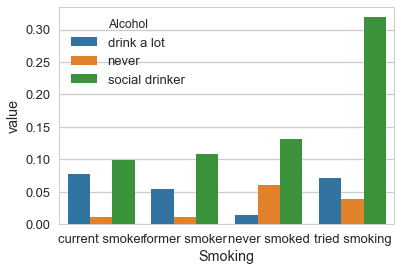

In [19]:

import seaborn
 # representación gráfica de la probabilidad conjunta.# repres 
stacked = joint_probability.stack().reset_index().rename(columns={0:'value'})
seaborn.barplot(x=stacked.Smoking, y=stacked.value, hue=stacked.Alcohol)
plt.show()
